# UV-Vis Absorbance based binding assay of CYP450 BM3 M11 Mutants with Mefenamic Acid

Experiment Date: 2016/08/16

Lab Notebook: 'Lab notebook of Cyt P450 BM3 M11 absorbance binding experiment (start date 20160808)'  [https://docs.google.com/a/choderalab.org/document/d/1I4_gthwkAR8LmuRiyFkPUIlxPWRBED8IrobhFrOuH7w/edit?usp=sharing]  


Proteins:
- ROW A - **M11-0**: Cytochrome P450 BM3 M11 
- ROW C - **M11-1**: Cytochrome P450 BM3 M11 V87I
- ROW E - **M11-2**: Cytochrome P450 BM3 M11 V87F
- ROW G - **M11-3**: Cytochrome P450 BM3 M11 V87I L437N

Ligand:
- Mefenamic Acid

Absorbance Spectra:
- Step 1 (just protein dispensed)  
    MI_mutants_Mef_abs_spec_step1_20160816_152229.csv
- Step 2 (after protein and ligand were dispensed)  
    MI_mutants_Mef_abs_spec_step2_20160816_154448.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#import matplotlib.cm as cm 
#import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
#For converting letters to strings
import string
letter_dic=dict(zip(string.letters,[ord(c)%32 for c in string.letters]))
letter_dic['E'] 

def plot_spectra_row(df, row, n_wells=24, xmin=380, xmax= 490, ymin=0.05, ymax=0.15, title = None):
    fig = plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')
    
    # Converting row letters to 0 based index
    row_number = letter_dic[row] - 1
    
    for i, row in df.iloc[(row_number*n_wells):(n_wells+row_number*n_wells),:].iterrows():
    
        x = df.ix[:,1:].columns.values
        y = row.ix[1:].values
    
        color_index = i - row_number*n_wells
        plt.plot(x, y, c=cm.hsv(color_index*10), label=row.ix[0], linewidth=0.5)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.legend(bbox_to_anchor=(1.15,1.01), fontsize=8)
    plt.xlabel("Wavelength(nm)")
    plt.ylabel("Absorbance")
    if title != None:
        plt.title(title)
    plt.show()

In [31]:
def plot_DeltaA_binding_curve(df, row, wl1=390, wl2=420, number_of_wells=24, title=None):
    # Converting row letters to 0 based index
    row_number = letter_dic[row] - 1
    n_wells = number_of_wells
    
    A_wl1 = np.array(df.ix[(row_number*n_wells):(n_wells+row_number*n_wells-1),str(wl1)])
    A_wl2= np.array(df.ix[(row_number*n_wells):(n_wells+row_number*n_wells-1),str(wl2)])
    
    # Difference in absorbance
    DeltaA= A_wl1-A_wl2
    
    plt.plot(lig_conc, DeltaA, "o")
    plt.xlabel("Concentration (uM)")
    plt.ylabel("Delta Absorbance")
    if title != None:
        plt.title(title)
    plt.show()

## Step 1 - Protein dispensed.

In [4]:
# Read csv file of absorbance measurements
df_step1_spectra = pd.read_csv("MI_mutants_Mef_abs_spec_step1_20160816_152229.csv")

# Fix column names

# Change column label of Well label column to an intiger
df_step1_spectra = df_step1_spectra.rename(columns = {'*':'0'})
# Change column names to wavelength numbers without units
df_step1_spectra= df_step1_spectra.rename(columns=lambda x: int(x.replace("nm","")))
# Change column label of Well label column to "well"
df_step1_spectra = df_step1_spectra.rename(columns = {0 :'well'})
df_step1_spectra.head()

,well,240,245,250,255,260,265,270,275,280,...,705,710,715,720,725,730,735,740,745,750
0,A1,3.7089,3.5958,3.6410,3.8074,3.5738,3.6721,3.4479,3.1723,0.9331,...,0.0394,0.0416,0.0409,0.0404,0.0401,0.0405,0.0417,0.0431,0.0430,0.0448
1,A2,3.6921,3.7928,3.6175,3.6244,3.5827,3.5581,3.4662,3.1671,0.9490,...,0.0408,0.0418,0.0423,0.0425,0.0428,0.0436,0.0447,0.0440,0.0437,0.0446
2,A3,3.5291,3.6770,3.7394,3.6198,3.5847,3.5545,3.4555,3.1741,0.9638,...,0.0431,0.0430,0.0436,0.0436,0.0439,0.0445,0.0459,0.0451,0.0452,0.0461
3,A4,3.7048,3.5806,3.6376,3.7994,3.5353,3.5702,3.5362,3.1788,0.9631,...,0.0425,0.0424,0.0430,0.0430,0.0434,0.0440,0.0452,0.0448,0.0444,0.0455
4,A5,3.7042,3.6775,3.7421,3.6287,3.5360,3.4852,3.5369,3.2104,0.9614,...,0.0423,0.0421,0.0428,0.0430,0.0428,0.0440,0.0453,0.0447,0.0447,0.0459


In [5]:
#wavelengths
df_step1_spectra.columns.values

array(['well', 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295,
       300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360,
       365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425,
       430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490,
       495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555,
       560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620,
       625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685,
       690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750], dtype=object)

In [6]:
# Concentration array for ligand
dilution_step = 22.0
highest_conc = 100 # uM
lowest_conc = 0.02 # uM

# dilution factor (logarithmic dilution)
n = (highest_conc/lowest_conc)**(1/dilution_step)

lig_conc = np.zeros([24], dtype=float)
lig_conc[0]=highest_conc

for (i, c) in np.ndenumerate(lig_conc):
    i=i[0]

    if i==0:
        lig_conc[i]=highest_conc
        
    if (0<i) and (i<=22):
        lig_conc[i]=lig_conc[i-1]*(1/n)
        
    if (i>dilution_step):
        lig_conc[i]=0.0

print lig_conc

[  1.00000000e+02   6.78992535e+01   4.61030863e+01   3.13036515e+01
   2.12549457e+01   1.44319494e+01   9.79918595e+00   6.65357411e+00
   4.51772715e+00   3.06750301e+00   2.08281165e+00   1.41421356e+00
   9.60240452e-01   6.51996099e-01   4.42700484e-01   3.00590324e-01
   2.04098586e-01   1.38581417e-01   9.40957475e-02   6.38903101e-02
   4.33810437e-02   2.94554048e-02   2.00000000e-02   0.00000000e+00]


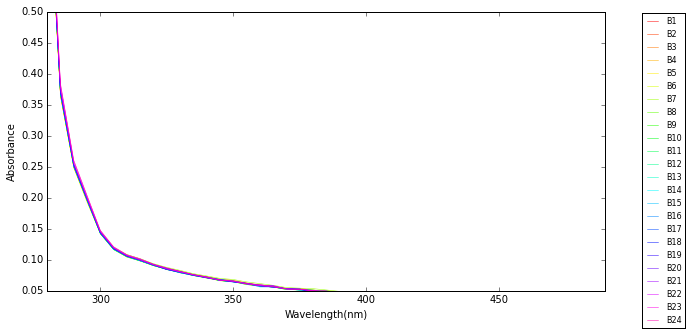

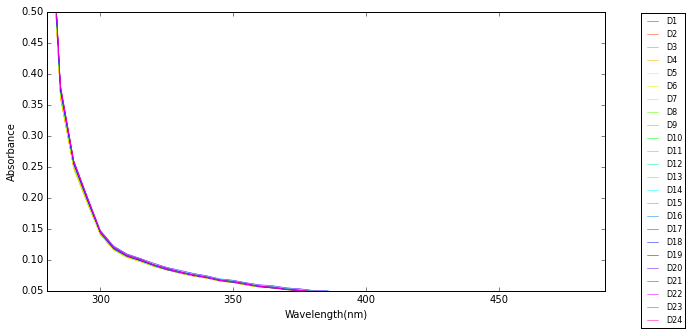

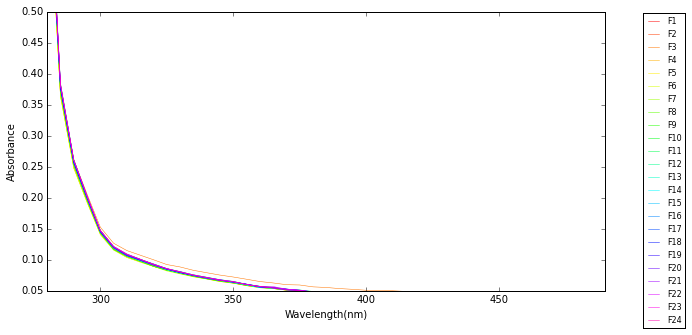

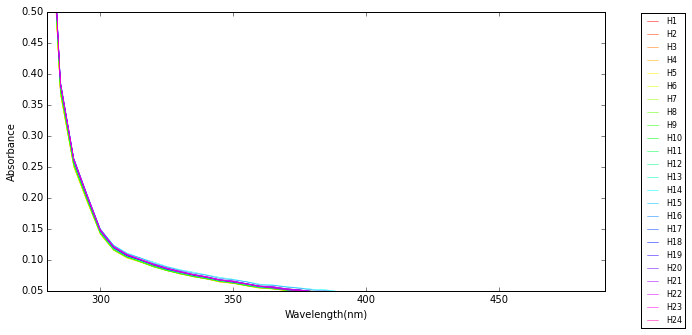

In [7]:
# Rows with just buffer
plot_spectra_row(df=df_step1_spectra, row="B", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step1_spectra, row="D",xmin=280, ymax=0.5)
plot_spectra_row(df=df_step1_spectra, row="F", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step1_spectra, row="H", xmin=280, ymax=0.5)

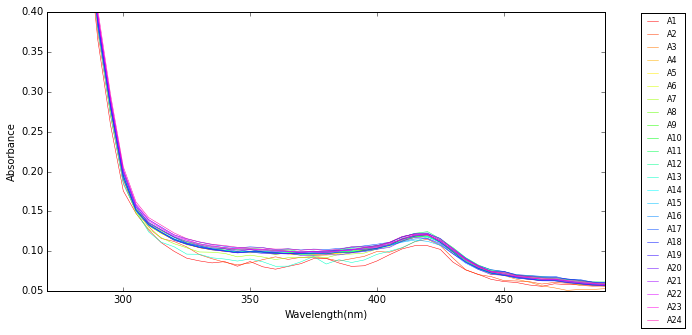

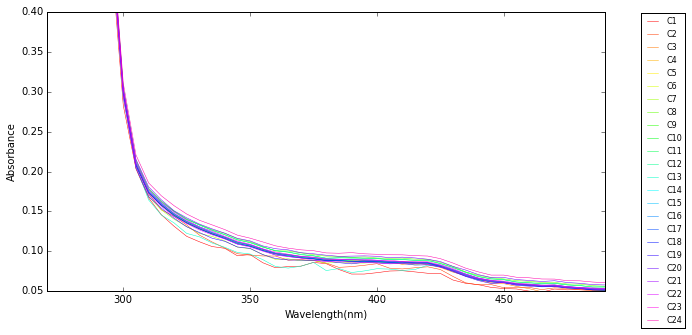

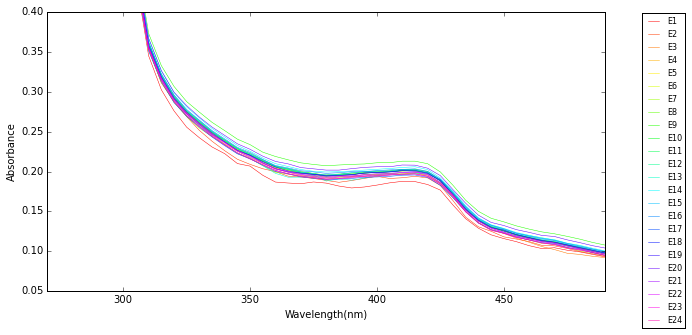

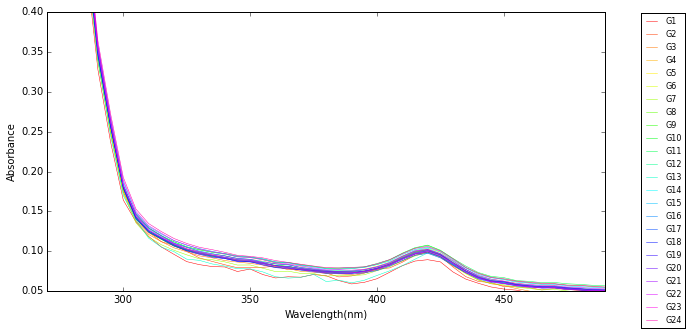

In [8]:
# Rows with protein (no ligand)
plot_spectra_row(df=df_step1_spectra, row="A", xmin=270, ymax=0.4)
plot_spectra_row(df=df_step1_spectra, row="C",xmin=270, ymax=0.4)
plot_spectra_row(df=df_step1_spectra, row="E", xmin=270, ymax=0.4)
plot_spectra_row(df=df_step1_spectra, row="G", xmin=270, ymax=0.4)

## Step 2 - Protein and ligand dispensed.

In [9]:
# Read csv file of absorbance measurements
df_step2_spectra = pd.read_csv("MI_mutants_Mef_abs_spec_step2_20160816_154448.csv")

# Fix column names

# Change column label of Well label column to an intiger
df_step2_spectra = df_step2_spectra.rename(columns = {'*':'0'})
# Change column names to wavelength numbers without units
df_step2_spectra= df_step2_spectra.rename(columns=lambda x: int(x.replace("nm","")))
# Change column label of Well label column to "well"
df_step2_spectra = df_step2_spectra.rename(columns = {0 :'well'})
df_step2_spectra.head()

,well,240,245,250,255,260,265,270,275,280,...,705,710,715,720,725,730,735,740,745,750
0,A1,3.9979,3.9639,3.9249,3.7941,3.8945,3.7107,3.8718,3.5528,1.3488,...,0.0496,0.0499,0.0493,0.0485,0.0487,0.0494,0.0505,0.0506,0.0506,0.0507
1,A2,3.9802,3.8514,3.8050,3.9653,3.7573,3.7397,3.7991,3.4653,1.2565,...,0.0431,0.0427,0.0424,0.0422,0.0421,0.0427,0.0437,0.0441,0.0437,0.0444
2,A3,3.8103,3.8474,3.8829,3.7731,3.7300,3.7050,3.7750,3.3652,1.1704,...,0.0445,0.0445,0.0439,0.0431,0.0440,0.0440,0.0452,0.0456,0.0455,0.0457
3,A4,3.6878,3.8501,3.7248,3.9677,3.6504,3.7386,3.6213,3.2820,1.1024,...,0.0435,0.0432,0.0438,0.0428,0.0432,0.0432,0.0443,0.0446,0.0447,0.0449
4,A5,3.8082,3.8527,3.7295,3.7900,3.6491,3.6474,3.6256,3.3110,1.0575,...,0.0430,0.0431,0.0432,0.0423,0.0428,0.0438,0.0444,0.0447,0.0446,0.0445


In [10]:
#wavelengths
df_step2_spectra.columns.values

array(['well', 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295,
       300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360,
       365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425,
       430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490,
       495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555,
       560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620,
       625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685,
       690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750], dtype=object)

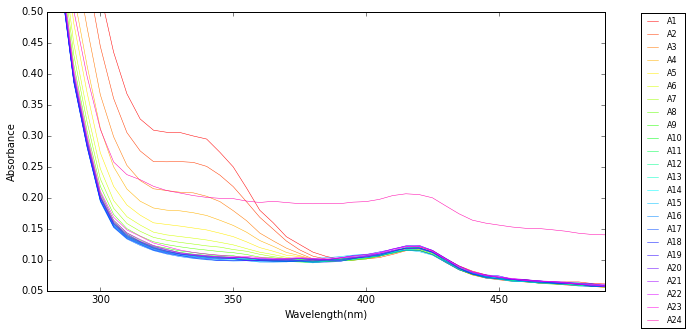

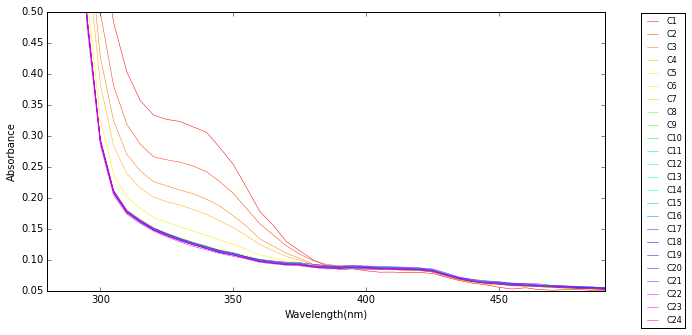

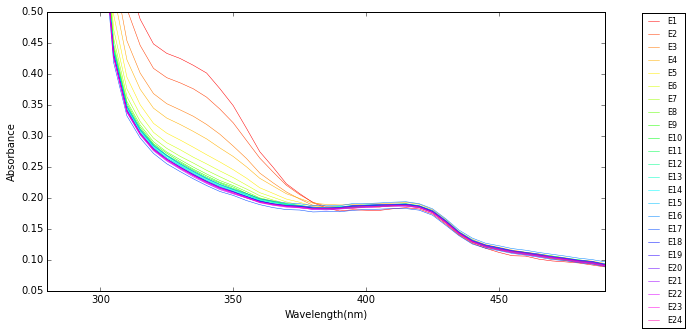

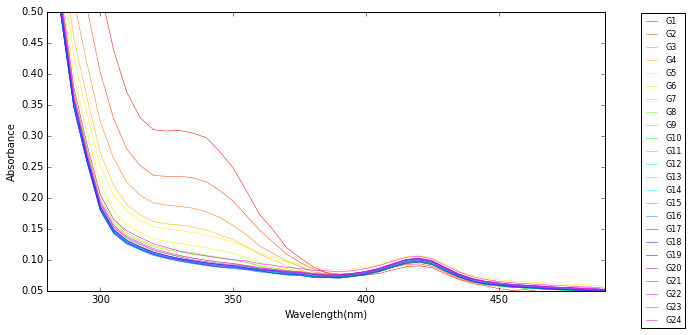

In [11]:
# Rows with protein
plot_spectra_row(df=df_step2_spectra, row="A", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step2_spectra, row="C", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step2_spectra, row="E", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step2_spectra, row="G", xmin=280, ymax=0.5)

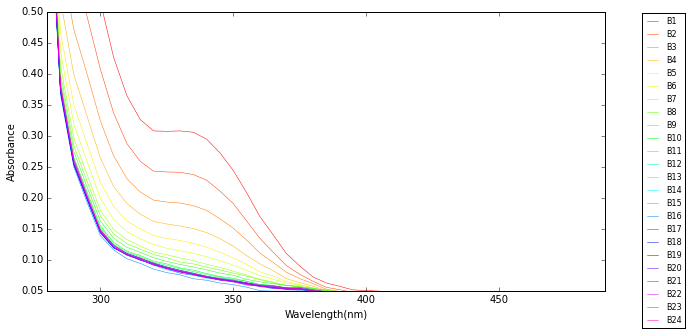

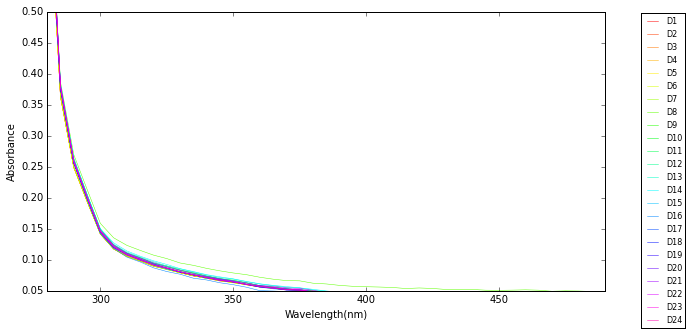

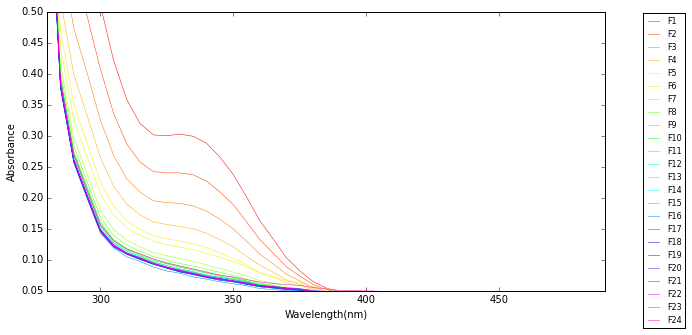

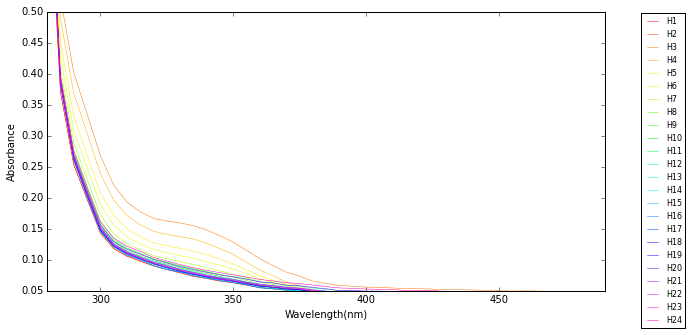

In [16]:
# Rows without protein
plot_spectra_row(df=df_step2_spectra, row="B", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step2_spectra, row="D", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step2_spectra, row="F", xmin=280, ymax=0.5)
plot_spectra_row(df=df_step2_spectra, row="H", xmin=280, ymax=0.5)

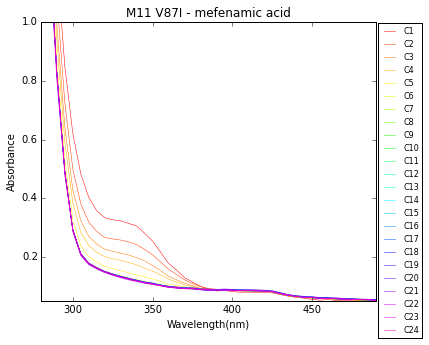

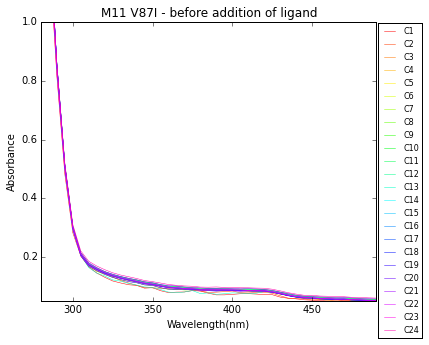

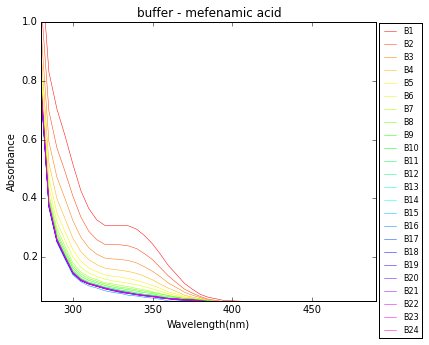

In [51]:
# Comparing row C and B(MI11 V87I - mefenamic acid)

# protein + ligand
plot_spectra_row(df=df_step2_spectra, row="C", xmin=280, ymax=1, title = "M11 V87I - mefenamic acid")

# protein
plot_spectra_row(df=df_step1_spectra, row="C", xmin=280, ymax=1, title = "M11 V87I - before addition of ligand")

# buffer + ligand
plot_spectra_row(df=df_step2_spectra, row="B", xmin=280, ymax=1, title = "buffer - mefenamic acid")


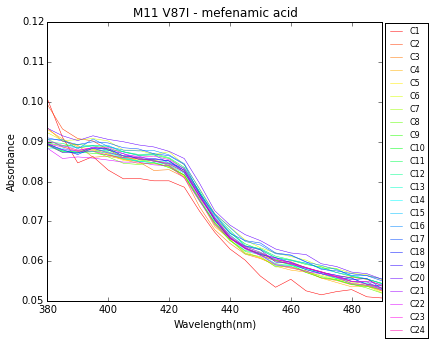

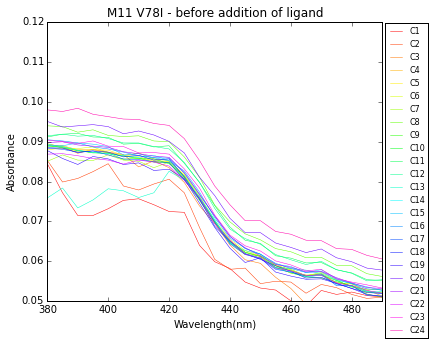

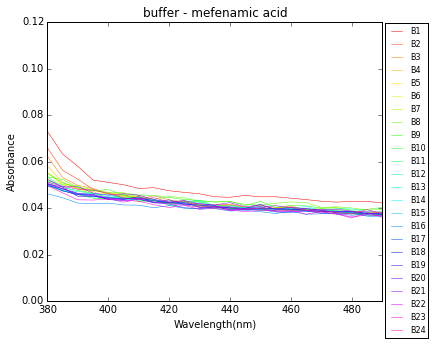

In [52]:
# Comparing row A and B [Same axis as in Venkataraman 2014 paper]

# protein + ligand
plot_spectra_row(df=df_step2_spectra, row="C", ymax=0.12, title="M11 V87I - mefenamic acid")

# protein
plot_spectra_row(df=df_step1_spectra, row="C", ymax=0.12, title="M11 V78I - before addition of ligand")

# buffer + ligand
plot_spectra_row(df=df_step2_spectra, row="B", ymax=0.12, ymin = 0.00 , title="buffer - mefenamic acid")

### Calculating DeltaA = A390-A420

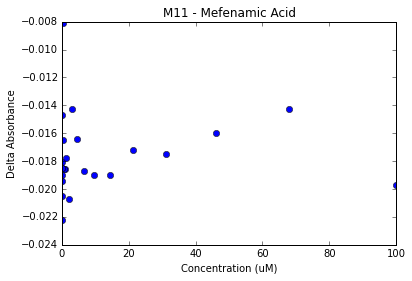

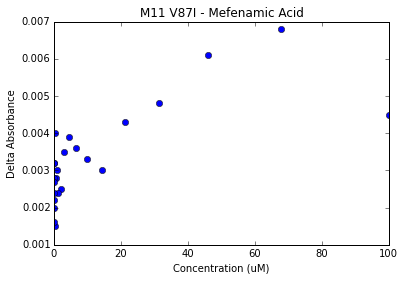

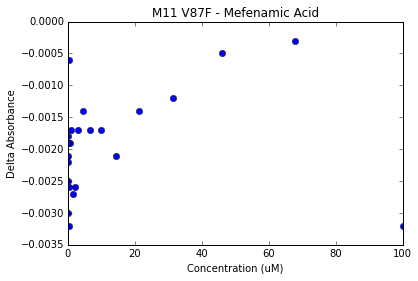

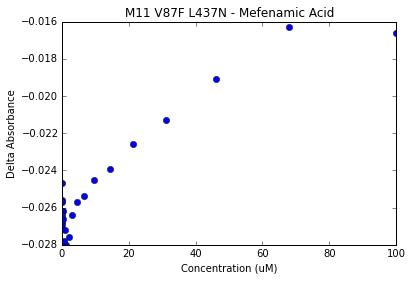

In [24]:
# Change column names to wavelength numbers without units
df_step2_spectra= df_step2_spectra.rename(columns=lambda x: str(x))

plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='A', title = "M11 - Mefenamic Acid")
plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='C', title = "M11 V87I - Mefenamic Acid")
plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='E', title = "M11 V87F - Mefenamic Acid")
plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='G', title = "M11 V87F L437N - Mefenamic Acid")

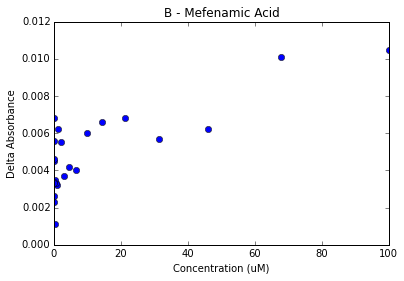

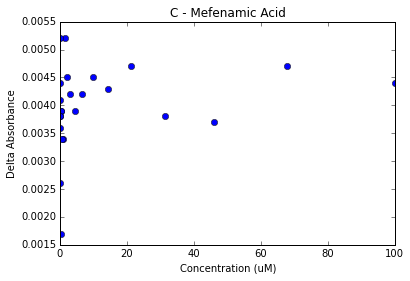

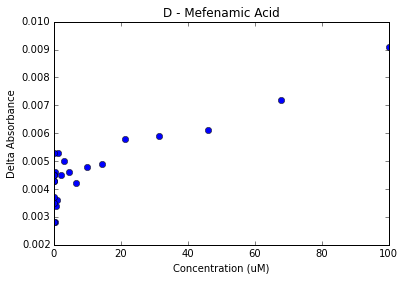

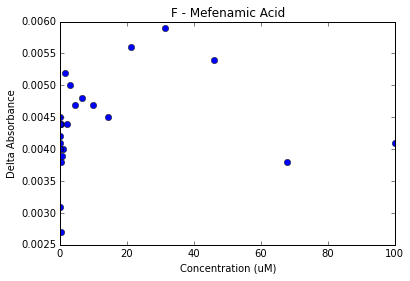

In [32]:
plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='B', title = "B - Mefenamic Acid")
plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='D', title = "C - Mefenamic Acid")
plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='F', title = "D - Mefenamic Acid")
plot_DeltaA_binding_curve(df=df_step2_spectra, wl1=390, wl2=420, row='H', title = "F - Mefenamic Acid")